In [69]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [70]:
import os

json_files = [f for f in os.listdir('.') if f.endswith('.json')]
combined_data = []

for json_file in json_files:
    with open(json_file, 'r') as file:
        data = json.load(file)
        combined_data.extend(data)


In [71]:
df = pd.json_normalize(combined_data)

In [72]:
spotify_data = pd.json_normalize(combined_data)

In [73]:
spotify_data

,endTime,artistName,trackName,msPlayed
0,2023-02-22 14:19,Nirvana,Something In The Way,34506
1,2023-02-22 14:19,Ellie Goulding,This Love (Will Be Your Downfall),47328
2,2023-02-22 14:19,Talking Heads,Pull up the Roots - 2005 Remaster,1045
3,2023-02-22 14:20,AC/DC,Beating Around the Bush,543
4,2023-02-22 14:21,Rod Stewart,Body Wishes - 2008 Remaster,0
...,...,...,...,...
26070,2023-10-03 16:26,Mac Miller,My Favorite Part,166250
26071,2023-10-03 16:30,Bruno Major,Tapestry,195562
26072,2023-10-03 16:30,Bruno Major,Nothing,9601
26073,2023-10-03 16:32,Bruno Major,The Most Beautiful Thing,129951


In [74]:
spotify_data.shape

(26075, 4)

In [75]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

In [76]:
# Check for missing values
print("Missing values:\n", spotify_data.isnull().sum())

Missing values:
 endTime       0
artistName    0
trackName     0
msPlayed      0
dtype: int64


In [77]:
# Convert 'endTime' to datetime format
spotify_data['endTime'] = pd.to_datetime(spotify_data['endTime'])

## Distribution of 'msPlayed'

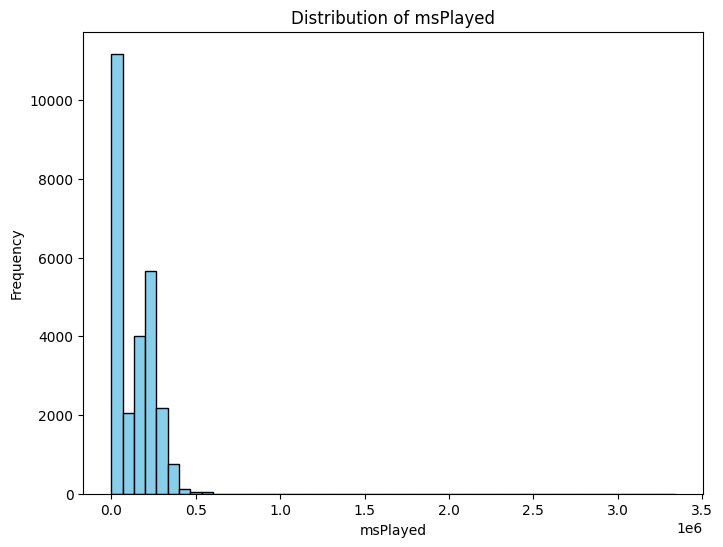

In [78]:
# Plot distribution of 'msPlayed'
plt.figure(figsize=(8, 6))
plt.hist(spotify_data['msPlayed'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of msPlayed')
plt.xlabel('msPlayed')
plt.ylabel('Frequency')
plt.show()


## Time Series Plots:
Plot the number of songs played over time to observe trends and patterns.
Create line plots to show how your listening behavior changes throughout the day or week.

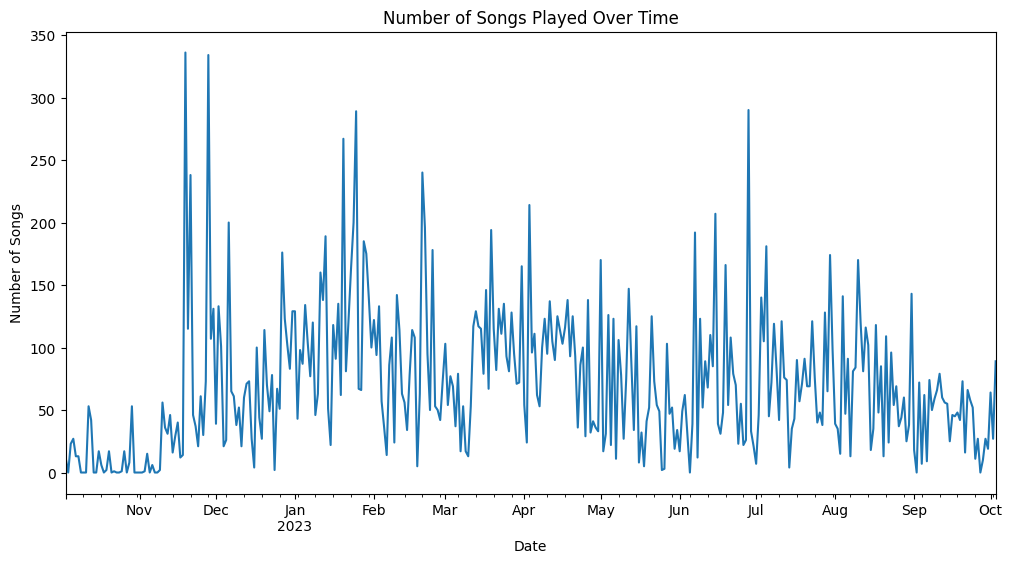

In [79]:
# Plot number of songs played over time
plt.figure(figsize=(12, 6))
spotify_data.set_index('endTime')['trackName'].resample('D').count().plot()
plt.title('Number of Songs Played Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Songs')
plt.show()


## top 20 most listened-to artists

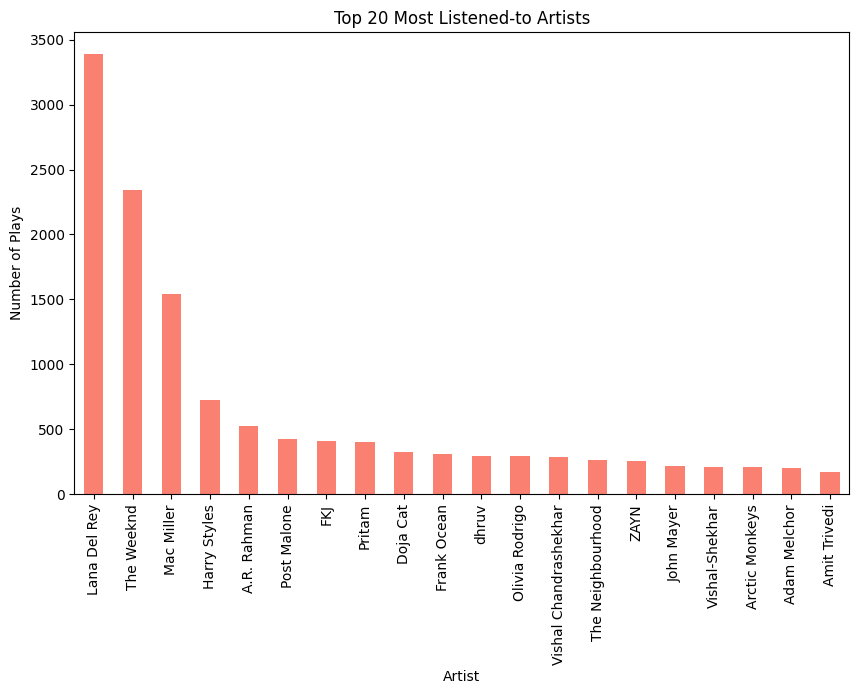

In [80]:
# Plot top N most listened-to artists
top_artists = spotify_data['artistName'].value_counts().nlargest(20)
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='salmon')
plt.title('Top 20 Most Listened-to Artists')
plt.xlabel('Artist')
plt.ylabel('Number of Plays')
plt.show()


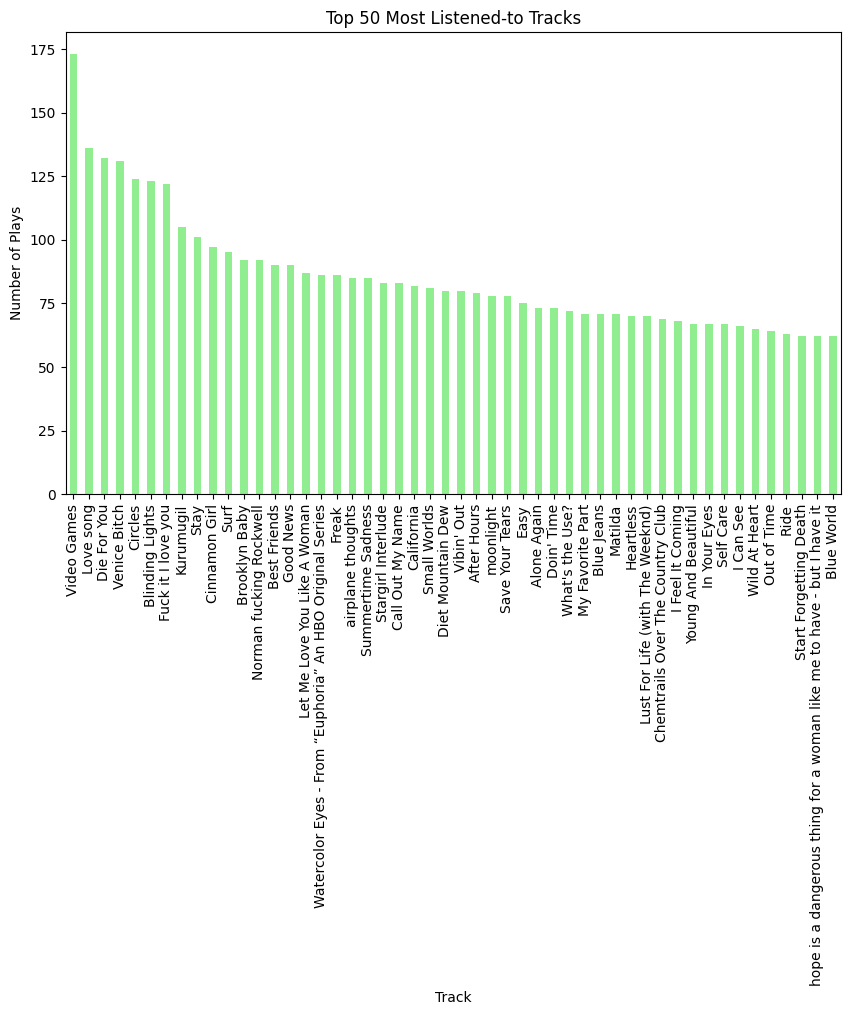

In [81]:
# Plot top N most listened-to tracks
top_tracks = spotify_data['trackName'].value_counts().nlargest(50)
plt.figure(figsize=(10, 6))
top_tracks.plot(kind='bar', color='lightgreen')
plt.title('Top 50 Most Listened-to Tracks')
plt.xlabel('Track')
plt.ylabel('Number of Plays')
plt.show()


In [82]:
# Feature Engineering: Extract day of the week and hour of the day
spotify_data['day_of_week'] = spotify_data['endTime'].dt.day_name()
spotify_data['hour_of_day'] = spotify_data['endTime'].dt.hour


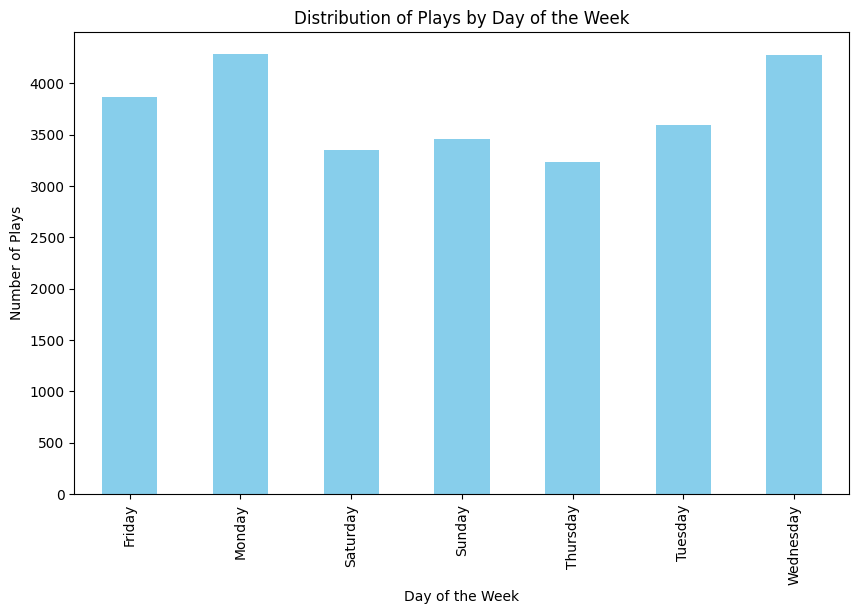

In [83]:
# Plot the distribution of plays by day of the week
plt.figure(figsize=(10, 6))
spotify_data['day_of_week'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Plays by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Plays')
plt.show()


In [84]:
spotify_data['listening_streak'] = (spotify_data['endTime'].diff() > pd.Timedelta(minutes=30)).astype(int).cumsum()


In [85]:
spotify_data['day_night_preference'] = spotify_data['hour_of_day'].apply(lambda x: 'day' if 6 <= x < 18 else 'night')


In [86]:
spotify_data['weekday_or_weekend'] = spotify_data['day_of_week'].apply(lambda x: 'weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'weekend')


In [87]:
spotify_data['skip_rate'] = (spotify_data['msPlayed'] == 0).astype(int).rolling(window=10).mean().fillna(0)


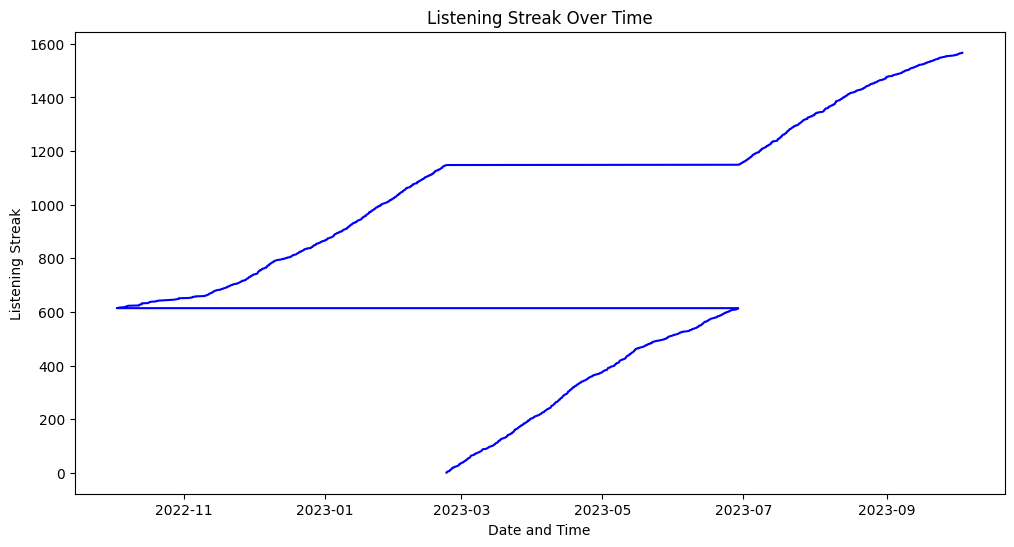

In [88]:
# Plot Listening Streak
plt.figure(figsize=(12, 6))
plt.plot(spotify_data['endTime'], spotify_data['listening_streak'], color='blue')
plt.title('Listening Streak Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Listening Streak')
plt.show()

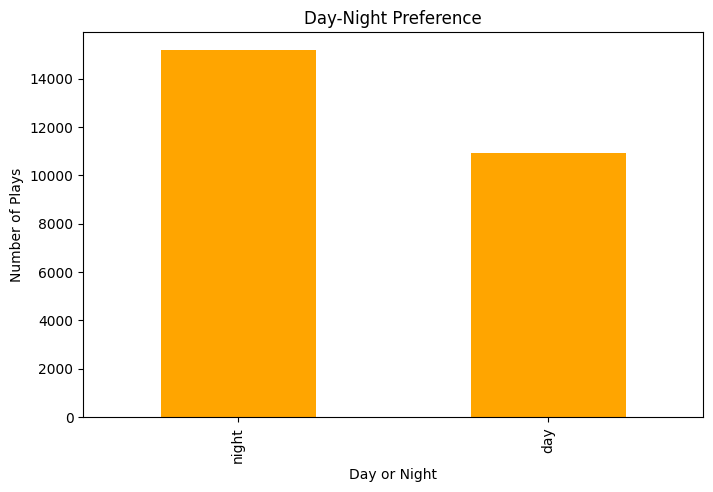

In [89]:
# Plot Day-Night Preference
plt.figure(figsize=(8, 5))
spotify_data['day_night_preference'].value_counts().plot(kind='bar', color='orange')
plt.title('Day-Night Preference')
plt.xlabel('Day or Night')
plt.ylabel('Number of Plays')
plt.show()

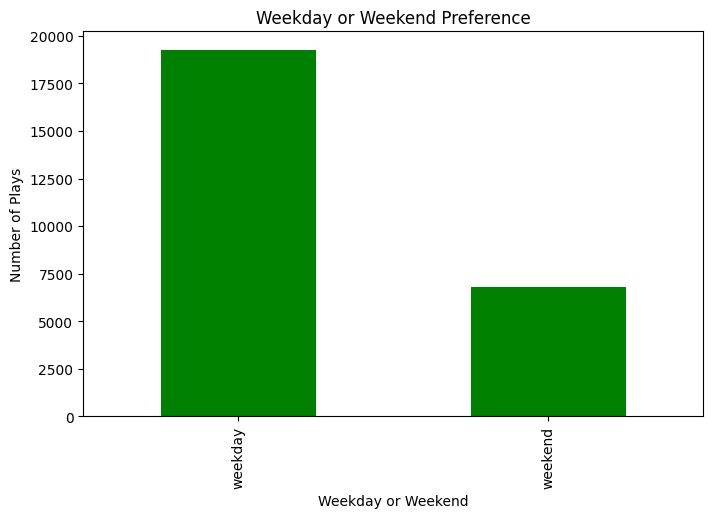

In [90]:
# Plot Weekday or Weekend Preference
plt.figure(figsize=(8, 5))
spotify_data['weekday_or_weekend'].value_counts().plot(kind='bar', color='green')
plt.title('Weekday or Weekend Preference')
plt.xlabel('Weekday or Weekend')
plt.ylabel('Number of Plays')
plt.show()

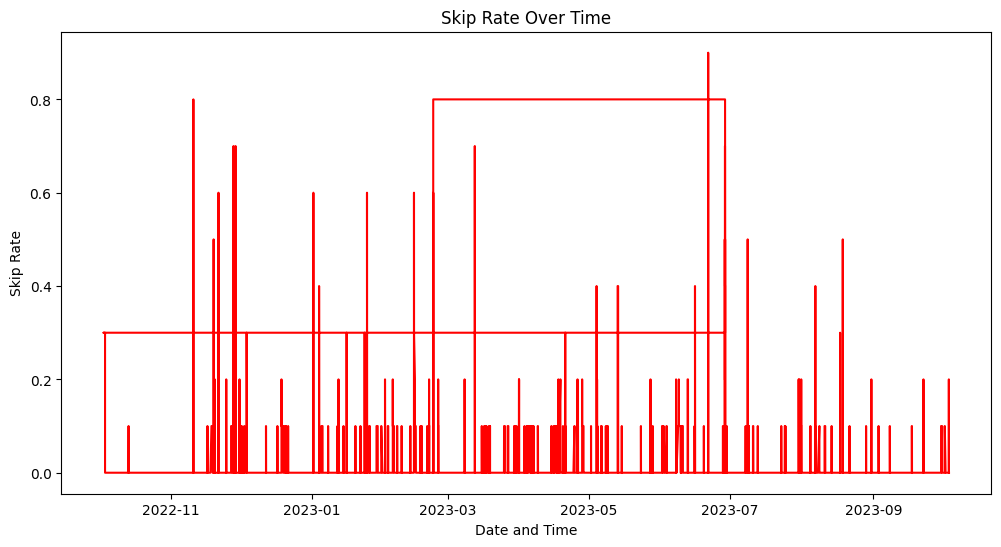

In [91]:
# Plot Skip Rate
plt.figure(figsize=(12, 6))
plt.plot(spotify_data['endTime'], spotify_data['skip_rate'], color='red')
plt.title('Skip Rate Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Skip Rate')
plt.show()

Listening Streak is plotted over time to visualize streaks of continuous
listening.<br>
Day-Night Preference and Weekday or Weekend Preference are visualized using bar plots to show the distribution of plays during different times of the day and week.<br>
Skip Rate is plotted over time to visualize how the skip rate changes





In [92]:
# Calculate total time listening in seconds
total_time_seconds = df['msPlayed'].sum() / 1000

# Convert total time to hours, minutes, and seconds
total_hours = total_time_seconds // 3600
total_minutes = (total_time_seconds % 3600) // 60
total_seconds = total_time_seconds % 60

print(f'Total Time Listening: {int(total_hours)} hours, {int(total_minutes)} minutes, {int(total_seconds)} seconds')

Total Time Listening: 931 hours, 14 minutes, 24 seconds


In [93]:
pip install spotipy pandas


### Feature Engineering : Extracting 'genres' using Spotify API calls

In [94]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

# Replace 'your_client_id' and 'your_client_secret' with your actual Spotify API credentials
client_id = 'fc38c2042cfa4a05a98428fa535da63e'
client_secret = '6c2e3f5adbff4275a692728d6c1facbf'

# Replace 'your_data.csv' with the actual file path or URL of your CSV file
data = df

# Initialize Spotify API client
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# Function to get genre information for a batch of artists
def get_batch_genres(artist_names):
    genres_dict = {}
    for artist_name in artist_names:
        results = sp.search(q=f'artist:{artist_name}', type='artist')
        if results['artists']['items']:
            genres_dict[artist_name] = results['artists']['items'][0]['genres']
    return genres_dict

# Function to get genre information with caching
def get_genres(row, cache):
    artist_name = row['artistName']

    # Check if the genre information is already cached
    if artist_name in cache:
        return cache[artist_name]

    # If not cached, fetch genre information and update the cache
    genres = get_batch_genres([artist_name])
    cache.update(genres)

    return genres.get(artist_name, None)

# Use caching to avoid redundant API calls
genre_cache = {}

# Apply the function to the DataFrame
data['genres'] = data.apply(lambda row: get_genres(row, genre_cache), axis=1)

# Display the updated DataFrame with genres
print(data.head())


            endTime      artistName                          trackName  \
0  2023-02-22 14:19         Nirvana               Something In The Way   
1  2023-02-22 14:19  Ellie Goulding  This Love (Will Be Your Downfall)   
2  2023-02-22 14:19   Talking Heads  Pull up the Roots - 2005 Remaster   
3  2023-02-22 14:20           AC/DC            Beating Around the Bush   
4  2023-02-22 14:21     Rod Stewart        Body Wishes - 2008 Remaster   

   msPlayed                                             genres  
0     34506                     [grunge, permanent wave, rock]  
1     47328          [indietronica, metropopolis, pop, uk pop]  
2      1045  [alternative rock, art punk, dance rock, funk ...  
3       543                 [australian rock, hard rock, rock]  
4         0                           [mellow gold, soft rock]  


In [95]:
df.head()

,endTime,artistName,trackName,msPlayed,genres
0,2023-02-22 14:19,Nirvana,Something In The Way,34506,"[grunge, permanent wave, rock]"
1,2023-02-22 14:19,Ellie Goulding,This Love (Will Be Your Downfall),47328,"[indietronica, metropopolis, pop, uk pop]"
2,2023-02-22 14:19,Talking Heads,Pull up the Roots - 2005 Remaster,1045,"[alternative rock, art punk, dance rock, funk ..."
3,2023-02-22 14:20,AC/DC,Beating Around the Bush,543,"[australian rock, hard rock, rock]"
4,2023-02-22 14:21,Rod Stewart,Body Wishes - 2008 Remaster,0,"[mellow gold, soft rock]"


### New Dataset with genres

In [96]:
# Save DataFrame to CSV file
csv_filename = "listening_history.csv"
df.to_csv(csv_filename, index=False)

In [97]:
songs = pd.read_csv('listening_history.csv')
songs.head()

,endTime,artistName,trackName,msPlayed,genres
0,2023-02-22 14:19,Nirvana,Something In The Way,34506,"['grunge', 'permanent wave', 'rock']"
1,2023-02-22 14:19,Ellie Goulding,This Love (Will Be Your Downfall),47328,"['indietronica', 'metropopolis', 'pop', 'uk pop']"
2,2023-02-22 14:19,Talking Heads,Pull up the Roots - 2005 Remaster,1045,"['alternative rock', 'art punk', 'dance rock',..."
3,2023-02-22 14:20,AC/DC,Beating Around the Bush,543,"['australian rock', 'hard rock', 'rock']"
4,2023-02-22 14:21,Rod Stewart,Body Wishes - 2008 Remaster,0,"['mellow gold', 'soft rock']"


In [98]:
songs['genres'] = songs['genres'].apply(lambda x: str(x))

# Convert 'endTime' to datetime
songs['endTime'] = pd.to_datetime(songs['endTime'])

In [99]:
songs.head()

,endTime,artistName,trackName,msPlayed,genres
0,2023-02-22 14:19:00,Nirvana,Something In The Way,34506,"['grunge', 'permanent wave', 'rock']"
1,2023-02-22 14:19:00,Ellie Goulding,This Love (Will Be Your Downfall),47328,"['indietronica', 'metropopolis', 'pop', 'uk pop']"
2,2023-02-22 14:19:00,Talking Heads,Pull up the Roots - 2005 Remaster,1045,"['alternative rock', 'art punk', 'dance rock',..."
3,2023-02-22 14:20:00,AC/DC,Beating Around the Bush,543,"['australian rock', 'hard rock', 'rock']"
4,2023-02-22 14:21:00,Rod Stewart,Body Wishes - 2008 Remaster,0,"['mellow gold', 'soft rock']"


### Removing duplicate rows and aggregating total msPlayed for the same track songs

In [100]:
# Group by 'artistName' and 'trackName', then sum 'msPlayed'
df_grouped = songs.groupby(['artistName', 'trackName'])['msPlayed'].sum().reset_index()

# Print the resulting dataframe
print(df_grouped)

                     artistName                   trackName  msPlayed
0                     ((( O )))  (don't take me so) serious    117262
1                     ((( O )))     (tired of that) old sht      1045
2                     ((( O )))                         333         0
3                     ((( O )))                       Bayou    135446
4                     ((( O )))                    Creation     13716
...                         ...                         ...       ...
4822                      ¿Téo?                Thru My Hair    100500
4823             Ólafur Arnalds                     Respite   1120263
4824  落日飛車 Sunset Rollercoaster    Let There Be Light Again    315868
4825   박용인(어반 자카파), 권순일(어반 자카파)                      No Way    202720
4826                  정호(2MUCH)               You`re Pretty       133

[4827 rows x 3 columns]


In [101]:
df_grouped.shape

(4827, 3)

In [102]:
new_df=pd.read_csv('result_no_duplicates.csv')
new_df

,artistName,trackName,genres,msPlayed
0,((( O ))),(don't take me so) serious,['experimental hip hop'],117262
1,((( O ))),(tired of that) old sht,['experimental hip hop'],1045
2,((( O ))),333,['experimental hip hop'],0
3,((( O ))),Bayou,['experimental hip hop'],135446
4,((( O ))),Creation,['experimental hip hop'],13716
...,...,...,...,...
4822,¿Téo?,Thru My Hair,['latinx alternative'],100500
4823,Ólafur Arnalds,Respite,"['compositional ambient', 'icelandic classical...",1120263
4824,落日飛車 Sunset Rollercoaster,Let There Be Light Again,['taiwan indie'],315868
4825,"박용인(어반 자카파), 권순일(어반 자카파)",No Way,[],202720


In [114]:
new_df.tail(50)

,artistName,trackName,genres,msPlayed,combined_features
4777,gabocarina96,"Riki the Legendary Heropon (From ""Xenoblade Ch...",[],1190,gabocarina96 Riki the Legendary Heropon (From ...
4778,girl in red,Serotonin,"['bedroom pop', 'indie pop', 'norwegian indie'...",99815,girl in red Serotonin ['experimental hip hop']...
4779,girl in red,bad idea!,"['bedroom pop', 'indie pop', 'norwegian indie'...",64586,girl in red bad idea! ['experimental hip hop']...
4780,girl in red,watch you sleep.,"['bedroom pop', 'indie pop', 'norwegian indie'...",219787,girl in red watch you sleep. ['experimental hi...
4781,girl in red,we fell in love in october,"['bedroom pop', 'indie pop', 'norwegian indie'...",184153,girl in red we fell in love in october ['exper...
4782,gnash,feelings fade,"['alt z', 'pop']",1011539,gnash feelings fade ['experimental hip hop'] [...
4783,gnash,ilusm,"['alt z', 'pop']",845188,gnash ilusm ['experimental hip hop'] ['experim...
4784,gnash,left out,"['alt z', 'pop']",794993,gnash left out ['experimental hip hop'] ['expe...
4785,gnash,u only call me when it's raining out,"['alt z', 'pop']",324687,gnash u only call me when it's raining out ['e...
4786,grentperez,Why I Love You,['bedroom r&b'],116,grentperez Why I Love You ['experimental hip h...


In [103]:
pip install scikit-surprise


### Content Filtering algorithm using Count Vectorizer and cosine similarity

In [104]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Combine relevant features into a single column for text processing
new_df['combined_features'] = new_df['artistName'] + ' ' + new_df['trackName'] + ' ' + ' '.join(new_df['genres'].astype(str))

# Use CountVectorizer to convert text data into a matrix of token counts
vectorizer = CountVectorizer()
feature_matrix = vectorizer.fit_transform(new_df['combined_features'])

# Use cosine similarity to calculate the similarity between songs
cosine_sim = cosine_similarity(feature_matrix, feature_matrix)

# Function to get song recommendations based on input song index
def get_recommendations(song_index, cosine_sim=cosine_sim):
    # Get the pairwise similarity scores with other songs
    sim_scores = list(enumerate(cosine_sim[song_index]))

    # Sort the songs based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 5 recommendations (excluding the input song itself)
    top_songs = sim_scores[1:6]

    # Get the indices of the top songs
    song_indices = [index for index, _ in top_songs]

    # Return the recommended songs
    return new_df.iloc[song_indices][['artistName', 'trackName', 'genres']]

# Example: Get recommendations for a song at index 0
recommendations = get_recommendations(0)
print(recommendations)


           artistName          trackName  \
1588             HNNY                 So   
924   Christian Kuria                 So   
2538            Mabel   Don't Call Me Up   
1369              FKJ      So Much to Me   
1733           Hozier  Take Me To Church   

                                                 genres  
1588  ['deep house', 'future garage', 'indie soul', ...  
924                          ['chill r&b', 'indie r&b']  
2538                                  ['pop', 'uk pop']  
1369                     ['filter house', 'indie soul']  
1733  ['irish singer-songwriter', 'modern rock', 'po...  


## Results

In [105]:
recommendations

,artistName,trackName,genres
1588,HNNY,So,"['deep house', 'future garage', 'indie soul', ..."
924,Christian Kuria,So,"['chill r&b', 'indie r&b']"
2538,Mabel,Don't Call Me Up,"['pop', 'uk pop']"
1369,FKJ,So Much to Me,"['filter house', 'indie soul']"
1733,Hozier,Take Me To Church,"['irish singer-songwriter', 'modern rock', 'po..."


### Content based filtering Algorithm with TF-IDF

Recommendations are made by comparing the content of items (in this case, songs) with the user's preferences. The TF-IDF vectorization represents the features of the songs, and the cosine similarity is used to measure the similarity between songs based on these features.

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

new_df['combined_features'] = new_df['artistName'] + ' ' + new_df['trackName'] + ' ' + ' '.join(new_df['genres'].astype(str))

# Use TfidfVectorizer to convert text data into a matrix of TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(new_df['combined_features'])

# Use cosine similarity to calculate the similarity between songs
cosine_sim_content = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get song recommendations based on input song index
def get_content_based_recommendations(song_index, cosine_sim=cosine_sim_content):
    # Get the pairwise similarity scores with other songs
    sim_scores = list(enumerate(cosine_sim[song_index]))

    # Sort the songs based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 5 recommendations (excluding the input song itself)
    top_songs = sim_scores[1:6]

    # Get the indices of the top songs
    song_indices = [index for index, _ in top_songs]

    # Return the recommended songs
    return new_df.iloc[song_indices][['artistName', 'trackName', 'genres']]


### Results

In [107]:
# Example: Get content-based recommendations for a song at index 0
content_based_recommendations = get_content_based_recommendations(0)
content_based_recommendations

,artistName,trackName,genres
13,((( O ))),Less Than Three,['experimental hip hop']
17,((( O ))),"One, Two",['experimental hip hop']
1704,Her's,What Once Was,"['latin alternative', 'latin rock', 'musica ar..."
1702,Her's,Cool with You,"['latin alternative', 'latin rock', 'musica ar..."
908,Chicago,Song for You,"['album rock', 'classic rock', 'mellow gold', ..."
